#Construção dos testes de hipóteses:
* *Passo 1:* Escolher o teste estatístico adequado, dado o intuito do pesquisador
* *Passo 2:* Apresentar a hipótese nula ${H_0}$ e a hipótese alternativa ${H_1}$ do teste.
* *Passo 3:* Fixar o nível de significância (probabilidade de erro do tipo 1) **α**.
* *Passo 4:* Calcular o valor observado da estatística do teste com base na amostra extraída da população.
* *Passo 5:* Determinar a região crítica do teste em função do valor de **α** fixado no passo 3.

Devemos definir a hipótese a ser testada sobre o parâmetro θ dessa população, que é chamada de hipótese nula:

$$H_0 : \theta = \theta_0 $$

Definiremos também a hipótese alternativa $(H_1)$, caso $H_0$ seja rejeitada, que pode ser caracterizada da seguinte forma:
$$H_1 : \theta \neq \theta_0 $$


#O Teste de Komogorov Smirnov

O Teste de K-S mede a diferença entre: *A Distribuição Real de uma amostra e a Distribuição Esperada*.

Assim, verificamos se a distribuição referente a amostra estudada é Normal.

* A nossa amostra apresentará a numeração de calçados de uma população.

As hipóteses do teste de Kolmogorov-Smirnov (K-S) para o nosso exemplo serão:

$H_0$: A numeração de calçados de uma população segue uma distribuição normal $N(μ, σ).$

$H_1$: A numeração de calçados de uma população não segue uma distribuição normal $N(μ, σ).$


Usaremos o seguinte críterio:

Se $D_{calc} > D_{c}$, Hipótese ${H_0}$  é **rejeitada**, nossa distribuição **NÃO** é uma distribuição **Normal.**

Se $D_{calc} < D_{c}$, Hipótese ${H_0}$  é **aceita**, nossa distribuição **é** uma distribuição **Normal.**

In [3]:
# @title Importação de bibliotecas
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

##Versão com homogenização dos dados

###Amostras com distrubuição aleatória

In [28]:
def analisar_amostra(limite_inferior, limite_superior, tamanho_amostra, probabilidades, n_amostras, amostras):
    resultados = []

    num_amostras = len(amostras)
    fig, axs = plt.subplots((num_amostras + 4) // 5, 5, figsize=(20, 5*((num_amostras + 4) // 5)))
    axs = axs.ravel()

    for i, amostra_aleatoria in enumerate(amostras, 1):
        amostra_serie = pd.Series(amostra_aleatoria)
        df = amostra_serie.value_counts().reset_index()
        df.columns = ['X_i', 'F_abs']  # Valor e Freq abs
        df = df.sort_values(by='X_i').reset_index(drop=True)

        df['F_ac'] = df['F_abs'].cumsum()  # Frequência acumulada
        df['F_r'] = df['F_abs'] / tamanho_amostra  # Frequência relativa
        df['F_obs'] = df['F_r'].cumsum()  # Frequência acumulada observada

        media = np.mean(amostra_aleatoria)
        desvio = np.std(amostra_aleatoria)
        erro_padrao = desvio / np.sqrt(len(amostra_aleatoria))
        min_val = np.min(amostra_aleatoria)
        max_val = np.max(amostra_aleatoria)
        soma = sum(amostra_aleatoria)
        count = len(amostra_aleatoria)
        variancia = np.var(amostra_aleatoria)

        df['Z-score'] = (df['X_i'] - media) / desvio
        df['F_esp'] = norm.cdf(df['Z-score'])
        df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['F_esp'] - df['F_obs'])
        df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['F_esp'] - df['F_obs'].shift(fill_value=0))

        max_Fesp_Fobs = df['|F_esp(X_i)-F_obs(X_i)|'].max()
        max_Fesp_Fobs1 = df['|F_esp(X_i)-F_obs(X_{i-1})|'].max()
        listaMax = [max_Fesp_Fobs, max_Fesp_Fobs1]
        Dcalc = np.max(listaMax)

        Dc = 1.36 / np.sqrt(tamanho_amostra)

        if Dcalc > Dc:
            hipotese = "Rejeitada. A distribuição é não-normal"
        else:
            hipotese = "Aceita. A distribuição é normal"

        resultados.append({
            'media': media,
            'erro_padrao': erro_padrao,
            'desvio_padrao': desvio,
            'variancia': variancia,
            'minimo': min_val,
            'maximo': max_val,
            'soma': soma,
            'contagem': count,
            'Dcalc': Dcalc,
            'Dc': Dc,
            'hipotese': hipotese
        })

        # Criar histograma da amostra atual com título indicando a hipótese
        axs[i - 1].hist(amostra_aleatoria, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        axs[i - 1].set_title(f'{hipotese}')
        axs[i - 1].set_ylabel('Frequência')
        axs[i - 1].grid(True)

    # Remover eixo para subplots não utilizados
    for j in range(num_amostras, len(axs)):
        axs[j].axis('off')

    plt.subplots_adjust(hspace=0.9)
    plt.tight_layout()
    plt.show()

    return resultados


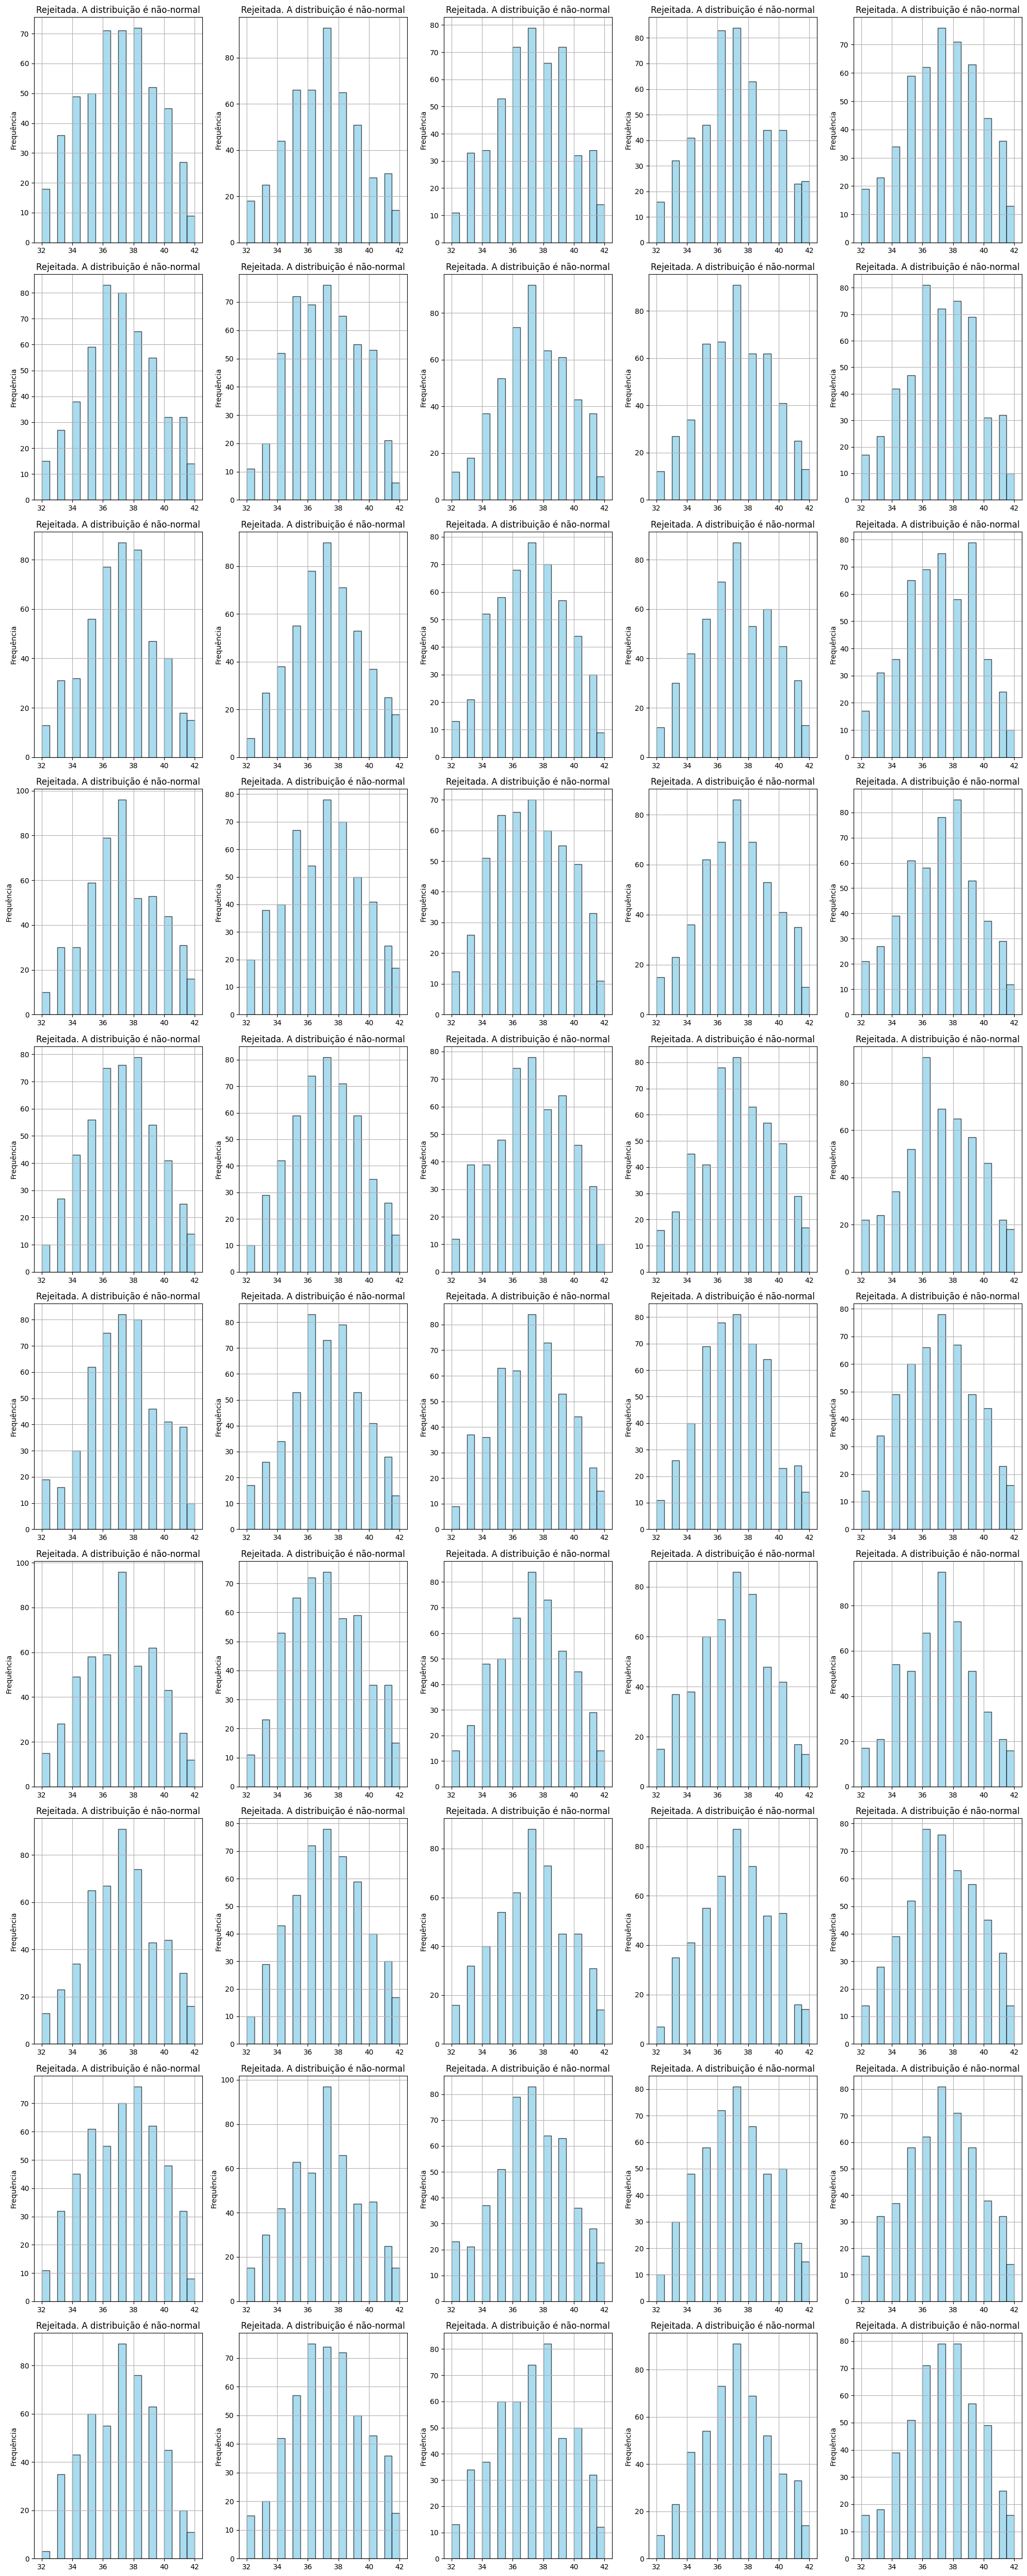

Resultados da amostra 1:
media: 36.824
erro_padrao: 0.11071606929438922
desvio_padrao: 2.475686571438315
variancia: 6.129023999999999
minimo: 32
maximo: 42
soma: 18412
contagem: 500
Dcalc: 0.09261354953945833
Dc: 0.06082104898799428
hipotese: Rejeitada. A distribuição é não-normal

Resultados da amostra 2:
media: 36.842
erro_padrao: 0.10797255206764354
desvio_padrao: 2.4143396612738646
variancia: 5.829035999999999
minimo: 32
maximo: 42
soma: 18421
contagem: 500
Dcalc: 0.09791091303140065
Dc: 0.06082104898799428
hipotese: Rejeitada. A distribuição é não-normal

Resultados da amostra 3:
media: 37.09
erro_padrao: 0.10816561375964173
desvio_padrao: 2.4186566519454553
variancia: 5.8499
minimo: 32
maximo: 42
soma: 18545
contagem: 500
Dcalc: 0.08914691537552877
Dc: 0.06082104898799428
hipotese: Rejeitada. A distribuição é não-normal

Resultados da amostra 4:
media: 36.978
erro_padrao: 0.11226322639226079
desvio_padrao: 2.510282055865436
variancia: 6.3015159999999995
minimo: 32
maximo: 42
soma

In [31]:
limite_inferior = 32
limite_superior = 42
tamanho_amostra = 500
probabilidades = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
#o número de amostras que vamos gerar
n_amostras = 50

amostras_geradas = []
for _ in range(n_amostras):
    amostra_aleatoria = random.choices(
        range(limite_inferior, limite_superior + 1),
        weights=[p / sum(probabilidades) for p in probabilidades],
        k=tamanho_amostra
    )
    amostras_geradas.append(amostra_aleatoria)

resultados = analisar_amostra(limite_inferior, limite_superior,
                              tamanho_amostra, probabilidades,
                              n_amostras, amostras_geradas)


#resultados (completos/não gráficos)
for i, resultado in enumerate(resultados, 1):
    print(f"Resultados da amostra {i}:")
    for chave, valor in resultado.items():
        print(f"{chave}: {valor}")
    print()


###Amostras com distribuição normal

In [6]:
#parâmetros das amostras normais
media = 0
desvio_padrao = 1
tamanho_amostra = 1000
n_amostras = 50

#geração de amostras normais
amostras_normais = [np.random.normal(loc=media, scale=desvio_padrao, size=tamanho_amostra) for _ in range(n_amostras)]

#DataFrame para as amostras normais
df_amostras_normais = pd.DataFrame(amostras_normais)


In [20]:
def analisar_amostra(limite_inferior, limite_superior, tamanho_amostra, probabilidades, amostra):
    df = pd.Series(amostra).value_counts().reset_index()
    df.columns = ['X_i', 'F_abs']  # Valor e Freq abs
    df = df.sort_values(by='X_i').reset_index(drop=True)

    df['F_ac'] = df['F_abs'].cumsum()  # Frequência acumulada
    df['F_r'] = df['F_abs'] / tamanho_amostra  # Frequência relativa
    df['F_obs'] = df['F_r'].cumsum()  # Frequência acumulada observada

    media = np.mean(amostra)
    desvio = np.std(amostra)
    erro_padrao = desvio / np.sqrt(len(amostra))
    min_val = np.min(amostra)
    max_val = np.max(amostra)
    soma = sum(amostra)
    count = len(amostra)
    variancia = np.var(amostra)

    df['Z-score'] = (df['X_i'] - media) / desvio
    df['F_esp'] = norm.cdf(df['Z-score'])
    df['|F_esp(X_i)-F_obs(X_i)|'] = abs(df['F_esp'] - df['F_obs'])
    df['|F_esp(X_i)-F_obs(X_{i-1})|'] = abs(df['F_esp'] - df['F_obs'].shift(fill_value=0))

    max_Fesp_Fobs = df['|F_esp(X_i)-F_obs(X_i)|'].max()
    max_Fesp_Fobs1 = df['|F_esp(X_i)-F_obs(X_{i-1})|'].max()
    listaMax = [max_Fesp_Fobs, max_Fesp_Fobs1]
    Dcalc = np.max(listaMax)

    Dc = 1.36 / np.sqrt(tamanho_amostra)

    if Dcalc < Dc:
      hipotese = "Aceita. A distribuição é normal"
    else:
      hipotese = "Rejeitada. A distribuição é não-normal"

    return {
        'media': media,
        'erro_padrao': erro_padrao,
        'desvio_padrao': desvio,
        'variancia': variancia,
        'minimo': min_val,
        'maximo': max_val,
        'soma': soma,
        'contagem': count,
        'Dcalc': Dcalc,
        'Dc': Dc,
        'hipotese': hipotese,
        'amostra': amostra
    }

def plotar_amostras(resultados_amostras_df):
    n_amostras = len(resultados_amostras_df)
    n_linhas = (n_amostras + 4) // 5
    #define a altura proporcional ao número de linhas resolvendo o problema do gráfico achatado
    altura_subplot = 4 * n_linhas

    fig, axs = plt.subplots(n_linhas, 5, figsize=(20, altura_subplot))

    for i, resultado in enumerate(resultados_amostras_df, 1):
        ax = axs[(i - 1) // 5, (i - 1) % 5]
        ax.hist(resultado['amostra'], bins='auto')
        ax.set_title(resultado['hipotese'])

    #oculta eixos irrelevantes
    for ax in axs.flat[n_amostras:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

def analisar_amostras_df(df_amostras, limite_inferior, limite_superior, probabilidades):
    resultados = []
    tamanho_amostra = len(df_amostras.columns)

    for _, amostra in df_amostras.iterrows():
        resultado = analisar_amostra(limite_inferior, limite_superior, tamanho_amostra, probabilidades, amostra)
        resultados.append(resultado)

    return resultados

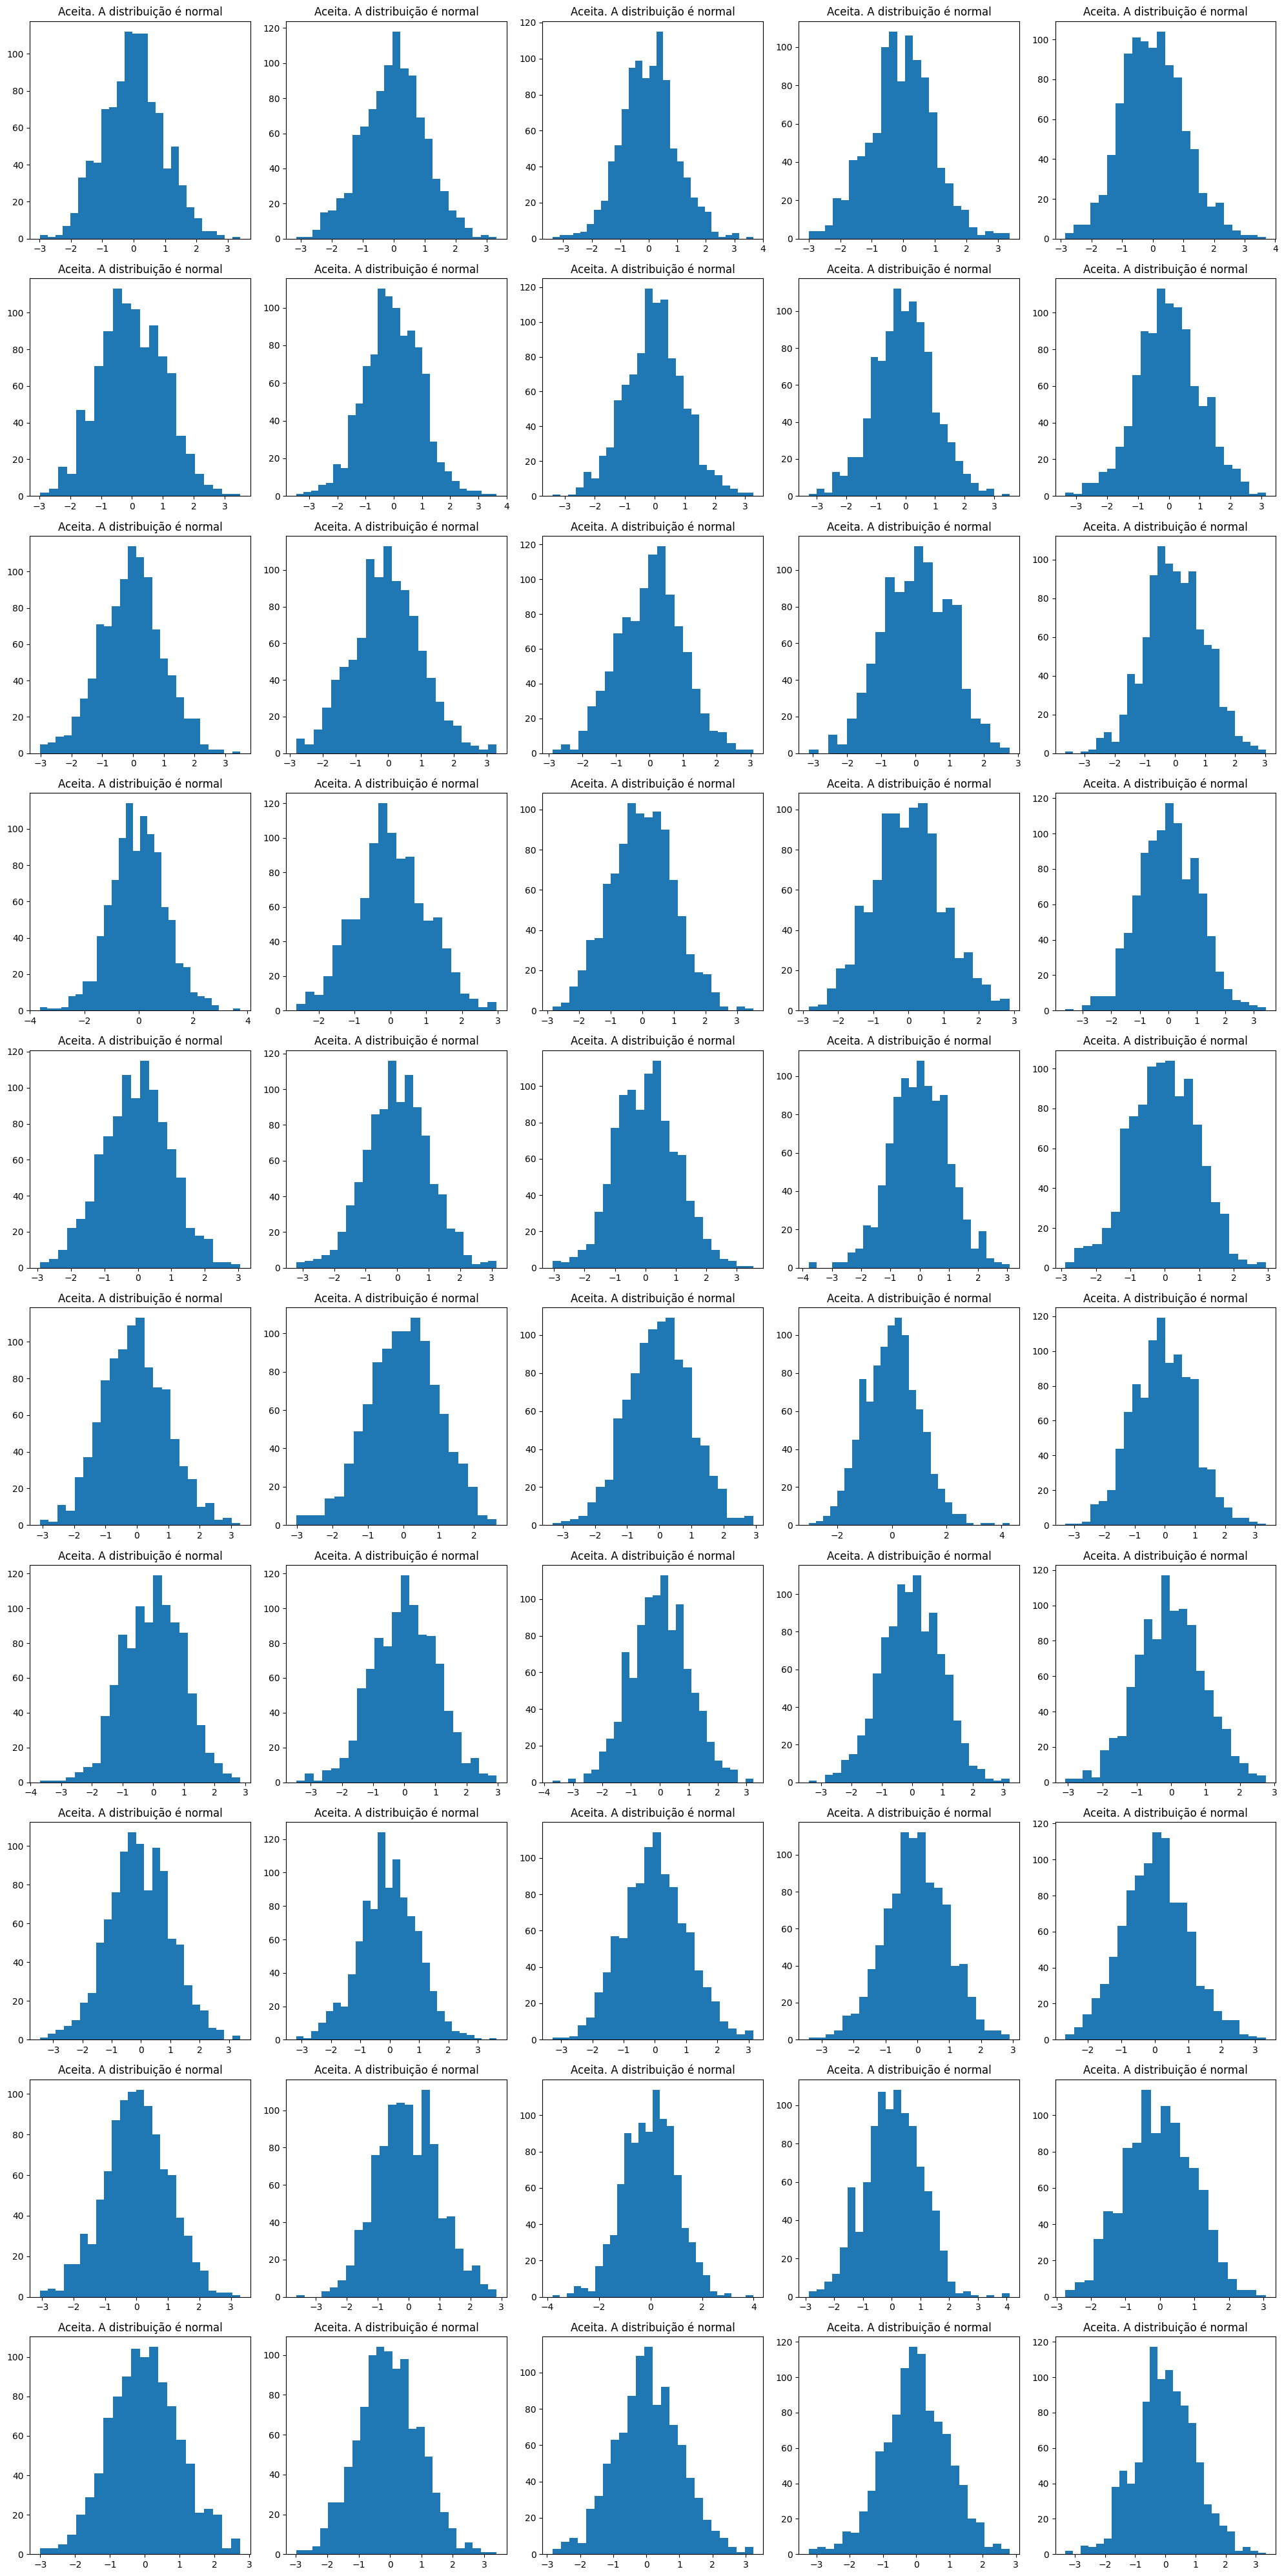

In [21]:
#analisa as amostras no DataFrame
resultados_amostras_df = analisar_amostras_df(df_amostras_normais, limite_inferior, limite_superior, probabilidades)

#plotar os gráficos das amostras
plotar_amostras(resultados_amostras_df)
